In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import argparse
import numpy as np
import cv2
import matplotlib.gridspec as gridspec

In [6]:
def centroid_histogram(clt):
	# grab the number of different clusters and create a histogram
	# based on the number of pixels assigned to each cluster
	numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
	(hist, _) = np.histogram(clt.labels_, bins = numLabels)
	# normalize the histogram, such that it sums to one
	hist = hist.astype("float")
	hist /= hist.sum()
	# return the histogram
	return hist

In [7]:
def plot_colors(hist, centroids):
	# initialize the bar chart representing the relative frequency
	# of each of the colors
	bar = np.zeros((50, 300, 3), dtype = "uint8")
	startX = 0
	# loop over the percentage of each cluster and the color of
	# each cluster
	for (percent, color) in zip(hist, centroids):
		# plot the relative percentage of each cluster
		endX = startX + (percent * 300)
		cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
			color.astype("uint8").tolist(), -1)
		startX = endX
	
	# return the bar chart
	return bar

In [8]:
def show(image):
    # Figure size in inches
    plt.figure(figsize=(15, 15))
    plt.imshow(image, interpolation='nearest')

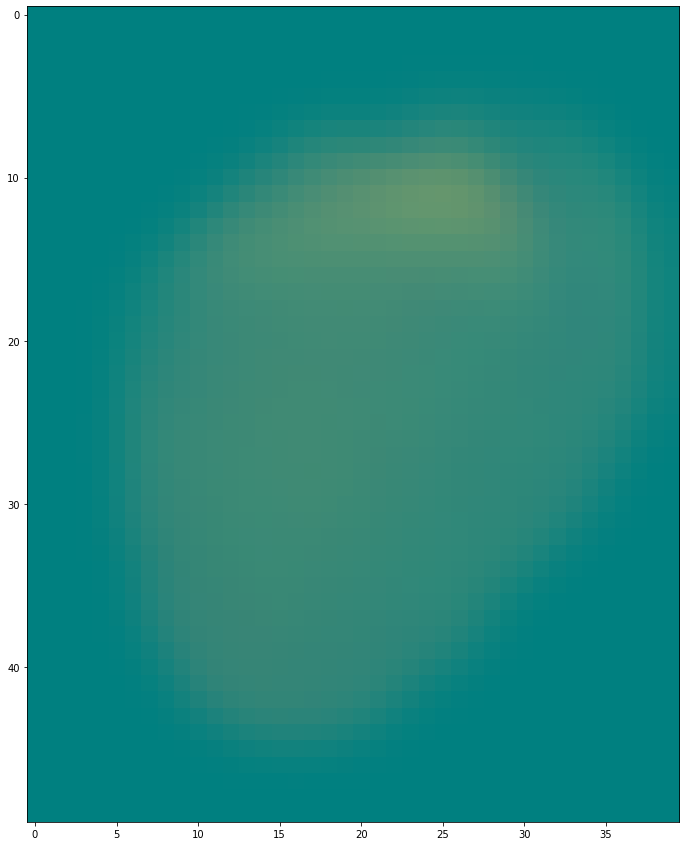

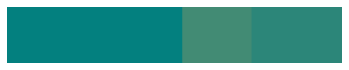

In [10]:
imagePath = "./Images/MaskedImages/mango_img_702_output.png"
image = cv2.imread(imagePath)
image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
image = image[190:240, 340:380]  #702
#image = image[240:340, 400:]  #703
#image = image[330:400, 300:400]  #793
#image = image[250:320, 280:330]  #952

image = cv2.GaussianBlur(image, (7, 7), 0)
show(image)
#show(image)

# reshape the image to be a list of pixels

image = image.reshape((image.shape[0] * image.shape[1], 3))

# cluster the pixel intensities
clt = KMeans(n_clusters = 3)
clt.fit(image)

# build a histogram of clusters and then create a figure
# representing the number of pixels labeled to each color
hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)
# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()


In [175]:
def showClusters():
    path = "./Images/MaskedImages/mango_img_702_output.png"
    
    colorSpace = [cv2.COLOR_BGR2RGB, cv2.COLOR_BGR2HSV, cv2.COLOR_BGR2LAB, cv2.COLOR_BGR2YCrCb]
    
    fig, ax = plt.subplots(4, 2, 
                       gridspec_kw={
                           'width_ratios': [10, 1],
                           'height_ratios': [10, 2, 1, 2]})

    fig2 = plt.figure(constrained_layout=True)
    spec2 = gridspec.GridSpec(ncols=2, nrows=2, figure=fig2)
    
    for cs in colorSpace:
        num = 0
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cs)
        image = cv2.GaussianBlur(image, (7, 7), 0)
        #show(image) 
        #ax[0][0].imshow(image)
        image = image.reshape((image.shape[0] * image.shape[1], 3))
        
        # cluster the pixel intensities
        clt = KMeans(n_clusters = 3)
        clt.fit(image)

        # build a histogram of clusters and then create a figure
        # representing the number of pixels labeled to each color
        hist = centroid_histogram(clt)
        bar = plot_colors(hist, clt.cluster_centers_)
        
        
        #ax[0][1].imshow(bar)
        
        f2_ax1 = fig2.add_subplot(spec2[0, 0])
        f2_ax2 = fig2.add_subplot(spec2[0, 1])
        f2_ax3 = fig2.add_subplot(spec2[1, 0])
        f2_ax4 = fig2.add_subplot(spec2[1, 1])
        
        
        # show our color bart
        '''plt.figure()
        plt.subplot(2, 6 , num+1)
        plt.axis("off")
        plt.imshow(bar)
        plt.show()'''
        
        num += 1
    

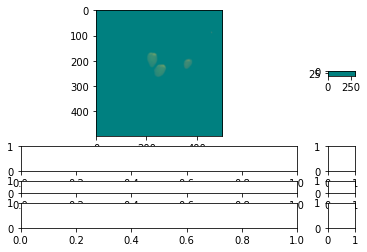

In [176]:
showClusters()

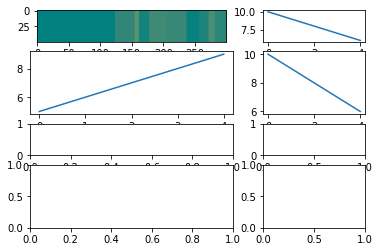

In [166]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(4, 2, 
                       gridspec_kw={
                           'width_ratios': [2, 1],
                           'height_ratios': [1, 2, 1, 2]})

ax[0][0].imshow(bar)
ax[0][1].plot(range(5), range(10, 5, -1))
ax[1][0].plot(range(5), range(5, 10))
ax[1][1].plot(range(5), range(10, 5, -1))

plt.show()

In [117]:
from collections import namedtuple
from math import sqrt
import random
try:
    import Image
except ImportError:
    from PIL import Image

Point = namedtuple('Point', ('coords', 'n', 'ct'))
Cluster = namedtuple('Cluster', ('points', 'center', 'n'))

def get_points(img):
    points = []
    w, h = img.size
    for count, color in img.getcolors(w * h):
        points.append(Point(color, 3, count))
    return points

rtoh = lambda rgb: '#%s' % ''.join(('%02x' % p for p in rgb))



def colorz(filename, n=4):
    img = Image.open(filename)
    img.thumbnail((200, 200))
    w, h = img.size

    points = get_points(img)
    clusters = kmeans(points, n, 1)
    rgbs = [map(int, c.center.coords) for c in clusters]
    
    return list(map(rtoh, rgbs))

def euclidean(p1, p2):
    return sqrt(sum([
        (p1.coords[i] - p2.coords[i]) ** 2 for i in range(p1.n)
    ]))

def calculate_center(points, n):
    vals = [0.0 for i in range(n)]
    plen = 0
    for p in points:
        plen += p.ct
        for i in range(n):
            vals[i] += (p.coords[i] * p.ct)
    return Point([(v / plen) for v in vals], n, 1)

def kmeans(points, k, min_diff):
    clusters = [Cluster([p], p, p.n) for p in random.sample(points, k)]

    while 1:
        plists = [[] for i in range(k)]

        for p in points:
            smallest_distance = float('Inf')
            for i in range(k):
                distance = euclidean(p, clusters[i].center)
                if distance < smallest_distance:
                    smallest_distance = distance
                    idx = i
            plists[idx].append(p)

        diff = 0
        for i in range(k):
            old = clusters[i]
            center = calculate_center(plists[i], old.n)
            new = Cluster(plists[i], center, old.n)
            clusters[i] = new
            diff = max(diff, euclidean(old.center, new.center))

        if diff < min_diff:
            break

    return clusters

In [118]:
imagePath_1 = "./Images/MaskedImages/mango_img_909_output.png"
#image_1 = cv2.imread(imagePath_1)
#image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)
#image_1 = image[190:240, 340:380]
#show(image_1)
colorz(imagePath_1)

['#221e17', '#3e3125', '#795342', '#000000']